# Model training:

Simple Train-Test Split (80-20%)  GA with k-fold (k=5).

MAE

In [1]:
import pandas as pd
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pickle

# Load your dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Prepare data
X = df.drop(['NAM', 'REP', 'VAR', 'PALK'], axis='columns')
Y = df['PALK']

# Standardize the features
stdScale = StandardScaler().fit(X)
X = stdScale.transform(X)

# Split dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize TPOTRegressor for hyperparameter optimization
tpot = TPOTRegressor(
    generations=10,  # Number of iterations
    population_size=20,  # Number of models per generation
    verbosity=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    cv=5  # 5-fold cross-validation
)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_train = tpot.fitted_pipeline_.predict(X_train)
y_pred_test = tpot.fitted_pipeline_.predict(X_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print("\nBest Model Details:")
print(f"Best Model: {tpot.fitted_pipeline_}")
print(f"Best Hyperparameters: {tpot.fitted_pipeline_.get_params()}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

# Save the best model as a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(tpot.fitted_pipeline_, f)

print("\nOptimization completed.")
print("Best model saved to 'best_model.pkl'.")


c:\Users\Afra\AppData\Local\Programs\Python\Python39\lib\site-packages\stopit\__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released 1 day ago.


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.02549917244655876

Generation 2 - Current best internal CV score: -0.022711041870822672

Generation 3 - Current best internal CV score: -0.021205076132686084

Generation 4 - Current best internal CV score: -0.02093107660834648

Generation 5 - Current best internal CV score: -0.020468182404540562

Generation 6 - Current best internal CV score: -0.020468182404540562

Generation 7 - Current best internal CV score: -0.020468182404540562

Generation 8 - Current best internal CV score: -0.020468182404540562

Generation 9 - Current best internal CV score: -0.020468182404540562

Generation 10 - Current best internal CV score: -0.020184109122168264

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

Best Model Details:
Best Model: Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False,
         

# Interpretation of R² Score:

R² ≈ 1 → Model predicts perfectly.

R² > 0.8 → Strong prediction.

R² ≈ 0.5-0.8 → Moderate prediction.

R² < 0.5 → Weak prediction.

R² < 0 → Model is worse than a simple average!

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the saved best model
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Load the dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Prepare data (same preprocessing as before)
X = df.drop(['NAM', 'REP', 'VAR', 'PALK'], axis='columns')
Y = df['PALK']

# Standardize the input features (same as in training)
stdScale = StandardScaler().fit(X)
X = stdScale.transform(X)

# Make predictions using the best model
Y_pred = best_model.predict(X)

# Calculate R² score
r2 = r2_score(Y, Y_pred)
print(f"R² Score of the Best Model: {r2:.4f}")

R² Score of the Best Model: 0.9916


# RMSE

In [1]:
import warnings
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Prepare data 
X = df.drop(['NAM', 'REP', 'VAR', 'PALK'], axis='columns')
Y = df['PALK']

# Standardize the input features 
stdScale = StandardScaler().fit(X)
X_scaled = stdScale.transform(X)

# Suppress sklearn/version warnings 
with warnings.catch_warnings():
    warnings.simplefilter("ignore") 


    # Load the saved best model 
    with open('best_model.pkl', 'rb') as f:
        best_model = pickle.load(f)

    # Make predictions
    Y_pred = best_model.predict(X_scaled)

# Compute RMSE 
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")


RMSE: 0.0125


# SHAP library

In [1]:
import pickle
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the best model from the pickle file
with open("best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

# Load the dataset
df = pd.read_excel("Dataset_11_features.xlsx") 
X = df.drop(['NAM', 'REP', 'VAR', 'PALK'], axis='columns') 
y = df["PALK"]
stdScale = StandardScaler().fit(X)
X_scale = stdScale.transform(X)

In [2]:
best_model

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False,
                                       max_features=0.7000000000000001,
                                       min_samples_split=5, random_state=42))])

In [3]:

best_model.fit(X, y)
explainer = shap.Explainer(best_model.predict, X)

shap_values = explainer(X)

PermutationExplainer explainer: 649it [02:58,  3.49it/s]                         


In [4]:
X.head()

,YER,DAT,WS,CWC,PP,GP,GW,GY,RWC,RS,CT
0,2022,276,95.945728,88.5,241.220657,28.728725,5.601088,6692.9504,96.100000,8.6,26.2
1,2022,276,96.644685,87.2,253.135601,29.110621,5.733584,6794.5362,97.200000,8.2,25.7
2,2022,276,93.649154,88.8,236.897576,27.319170,5.253353,6656.7416,95.799627,8.9,26.9
3,2022,276,88.200000,91.1,228.680100,25.714400,5.078671,5500.0000,94.479759,9.8,27.7
4,2022,276,86.300000,91.6,224.864360,25.464705,4.860317,5376.0000,94.109796,10.6,28.8


In [5]:
shap_values_dataframe = pd.DataFrame(shap_values.values, columns=X.columns)
shap_values_dataframe.head()

,YER,DAT,WS,CWC,PP,GP,GW,GY,RWC,RS,CT
0,0.019236,0.106738,0.008176,-0.004071,0.018187,-0.004997,-0.001248,-0.002739,0.026872,-0.003448,0.010047
1,0.029694,0.117566,0.006935,0.001206,0.016781,-0.003267,-0.000696,-0.001436,0.025582,-0.008376,0.000990
2,0.019491,0.099726,0.003518,-0.001945,0.016961,-0.002900,-0.001782,-0.003796,0.026200,-0.004452,0.011059
3,0.019972,0.100162,-0.002235,-0.006327,0.016294,-0.004511,-0.003011,0.001671,0.021994,-0.007413,0.013126
4,0.019676,0.093154,-0.001276,-0.005247,0.015503,-0.003498,-0.003452,0.002119,0.018303,-0.009250,0.011672


# Global Bar Plot and Beeswarm 

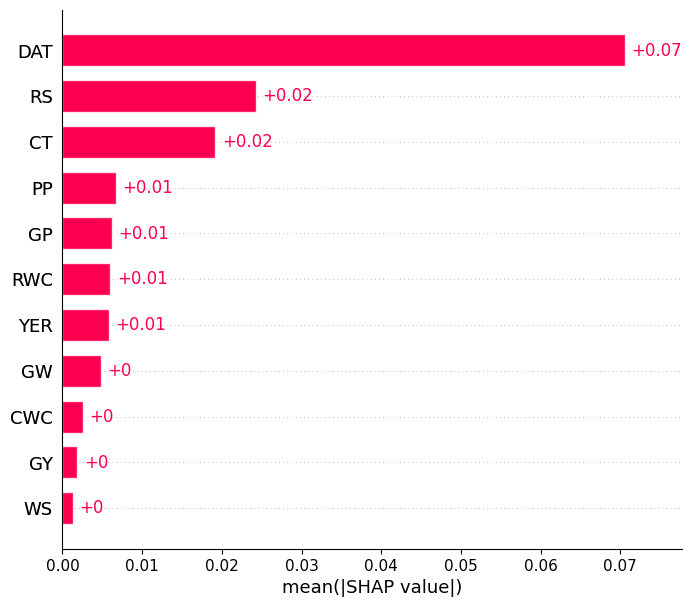

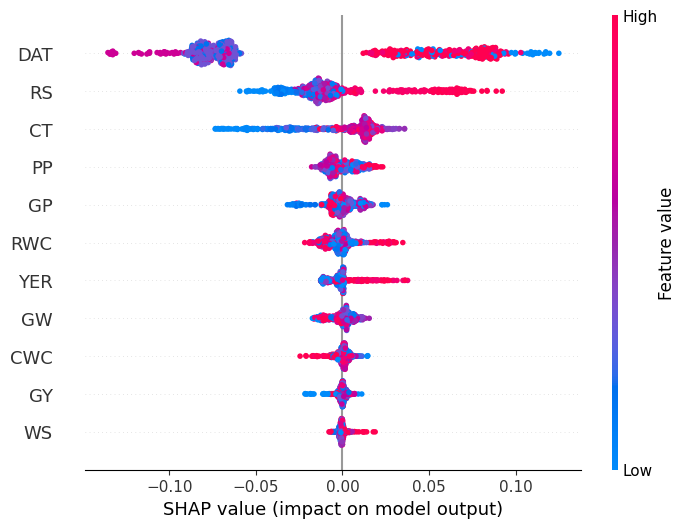

In [6]:
import os
import matplotlib.pyplot as plt

os.makedirs('ArticleFigures', exist_ok=True)


target = 'single'
dpi = 600

pixel_width = 1063 if target == 'single' else 2244
width_in = pixel_width / dpi
height_in = width_in * 0.6  

# --- Global bar plot ---
fig = plt.figure(figsize=(width_in, height_in))
shap.plots.bar(shap_values, max_display=11)
fig.savefig('ArticleFigures/Globalbarplot.png', dpi=dpi, bbox_inches='tight')
plt.close(fig)

# --- Beeswarm plot ---
fig = plt.figure(figsize=(width_in, height_in))
shap.plots.beeswarm(shap_values, max_display=11)
fig.savefig('ArticleFigures/beeswarm.png', dpi=dpi, bbox_inches='tight')
plt.close(fig)
